In [1]:
import netCDF4
import pytide


In [2]:
with netCDF4.Dataset("/Users/auraoupa/Work/git/pangeo-pytide/tests/dataset/fes_tide_time_series.nc") as dataset:
    time = dataset['time'][:] * 1e-6    # microseconds to epoch
    h = dataset['ocean'][:] * 1e-2      # cm to m

In [7]:
time

masked_array(data=[1.51476480e+09, 1.51476486e+09, 1.51476492e+09, ...,
                   1.54630062e+09, 1.54630068e+09, 1.54630074e+09],
             mask=False,
       fill_value=1e+20)

In [8]:
t = time.astype('datetime64[s]')

In [9]:
t

masked_array(data=['2018-01-01T00:00:00', '2018-01-01T00:01:00',
                   '2018-01-01T00:02:00', ..., '2018-12-31T23:57:00',
                   '2018-12-31T23:58:00', '2018-12-31T23:59:00'],
             mask=False,
       fill_value=numpy.datetime64('NaT'),
            dtype='datetime64[s]')

In [3]:
wt = pytide.WaveTable()

In [4]:
wt = pytide.WaveTable(["M2", "K1", "O1", "P1", "Q1", "S1"])

In [5]:
wt

pytide.WaveTable(M2, K1, O1, P1, Q1, S1)

In [10]:
f, vu = wt.compute_nodal_modulations(t)

In [13]:
w = wt.harmonic_analysis(h, f, vu)

In [14]:
w

array([-1.08733898e-03+4.33148568e-03j,  1.06997271e-03-1.58013935e-04j,
        8.59424419e-05-1.40355837e-04j,  3.02377180e-04-6.53766989e-05j,
       -3.34335989e-05+3.84013421e-05j, -1.26669899e-05+5.24259633e-05j])

In [17]:
hp = wt.tide_from_tide_series(time, w)

In [18]:
hp

array([0.00230298, 0.0023391 , 0.00237512, ..., 0.00542898, 0.00541407,
       0.00539884])

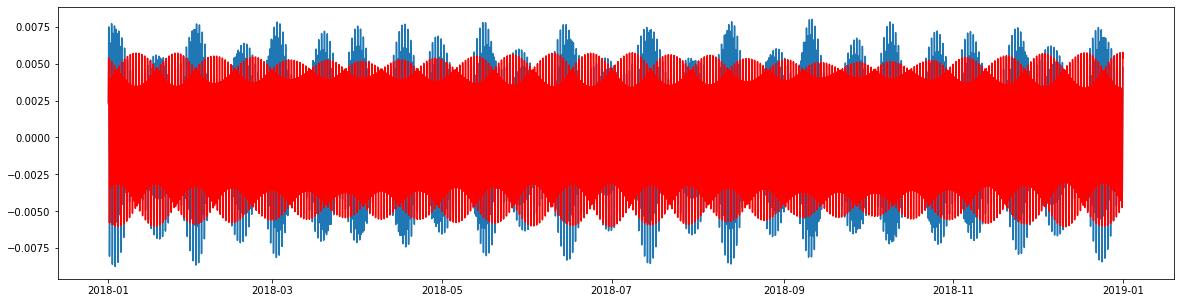

In [23]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20,5))
plt.plot(t,h)
plt.plot(t,hp,'r')

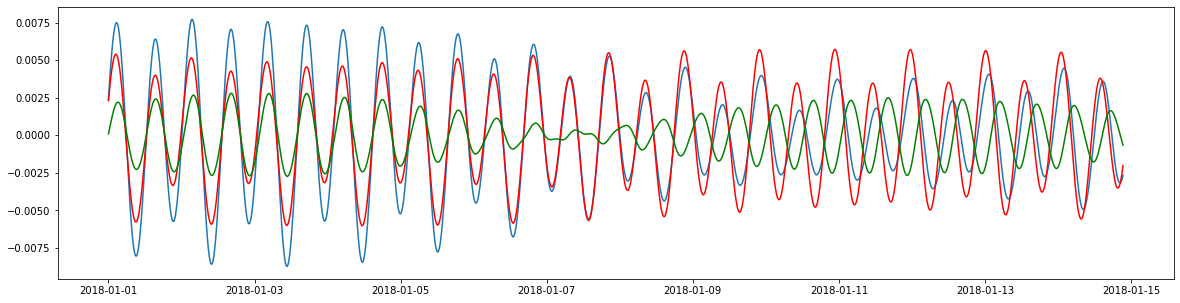

In [28]:
fig=plt.figure(figsize=(20,5))
plt.plot(t[0:20000],h[0:20000])
plt.plot(t[0:20000],hp[0:20000],'r')
plt.plot(t[0:20000],h[0:20000]-hp[0:20000],'g')


In [31]:
import sys
sys.path.insert(0,"/Users/auraoupa/Work/git/xscale")
import xscale

import xscale.spectral.fft as xfft
from xscale.spectral.tools import plot_spectrum
import xscale.signal.generator as xgen


/Users/auraoupa/Work/git/xscale/xscale/signal/fitting.py:153: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if type is 'constant':
/Users/auraoupa/Work/git/xscale/xscale/signal/fitting.py:156: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif type is 'linear':
/Users/auraoupa/Work/git/xscale/xscale/signal/fitting.py:159: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif type is 'quadratic':
/Users/auraoupa/Work/git/xscale/xscale/signal/fitting.py:285: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  modes_dims = tuple([di for di in modes.dims if di is not 'periods'])
/Users/auraoupa/Work/git/xscale/xscale/spectral/fft.py:155: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if detrend is 'mean':
/Users/auraoupa/Work/git/xscale/xscale/spectral/fft.py:161: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif detrend is 'linear':
/Users/auraoupa/Work/git/xscale/xscale/filtering/linearfilters.py:411: SyntaxWarning: "is" with a

In [32]:
h_xa=xr.DataArray(h,
   ...:                     dims=('x', 'y'),
   ...:                     coords={'x': [10, 20]})
   ...: 

masked_array(data=[0.00239179, 0.00244421, 0.00249654, ..., 0.00473385,
                   0.0047376 , 0.00474108],
             mask=False,
       fill_value=1e+20)

In [33]:
NPADDING = 2
SPtime_h = xfft.fft(h, dx=1., detrend='mean',nfft=h.shape[0]*NPADDING,tapering=True)


AttributeError: 'MaskedArray' object has no attribute 'dims'

In [ ]:
NPADDING = 2
SPtime_h = xfft.fft(h, dx=1., detrend='mean',nfft=h.shape[0]*NPADDING,tapering=True)
MEANPSD_h=xfft.psd(SPtime_h).load()
freqs_h=MEANPSD_h.f_time_counter.values
freqs_h = freqs_h[NPADDING::] 

SPtime_hp = xfft.fft(hp, dx=1., detrend='mean',nfft=hp.shape[0]*NPADDING,tapering=True)
MEANPSD_hp=xfft.psd(SPtime_hp).load()
freqs_hp=MEANPSD_hp.f_time_counter.values
freqs_hp = freqs_hp[NPADDING::] 


In [ ]:
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)

ax.loglog(freqs_FMA,MEANPSD_FMA[NPADDING::],'k',label='winter')
ax.loglog(freqs_ASO,MEANPSD_ASO[NPADDING::],'r',label='summer')
ax.set_xlim(1e-3,1)
ax.grid(which='both',axis='both')
plt.xlabel('Frequency (cpd)')
plt.ylabel('PSD (m2/cpd)')
plt.legend()
plt.title('Temporal Spectrum of SSH at one point')